In [1]:
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../../')
sys.path.insert(0,'../../../')
!sh local_setup.sh
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

import datetime
import time

Compiling pyrossgeo/Simulation.pyx because it changed.
Compiling pyrossgeo/__defs__.pyx because it changed.
Compiling pyrossgeo/_helpers.pyx because it changed.
Compiling pyrossgeo/_initialization.pyx because it changed.
Compiling pyrossgeo/_simulation.pyx because it changed.
[1/5] Cythonizing pyrossgeo/Simulation.pyx
[2/5] Cythonizing pyrossgeo/__defs__.pyx
[3/5] Cythonizing pyrossgeo/_helpers.pyx
[4/5] Cythonizing pyrossgeo/_initialization.pyx
[5/5] Cythonizing pyrossgeo/_simulation.pyx
running build_ext
building 'pyrossgeo.Simulation' extension
gcc -pthread -B /home/lukas/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/lukas/anaconda3/include/python3.7m -c pyrossgeo/Simulation.c -o build/temp.linux-x86_64-3.7/pyrossgeo/Simulation.o
In file included from /usr/include/numpy/ndarraytypes.h:1809:0,
                 from /usr/include/numpy/ndarrayobject.h:18,
                 from /usr/include/numpy/arrayobject.h:4,

Simulation parameters

In [2]:
model_path = 'model.json' 
commuter_networks_path = 'commuter_networks.csv'
node_parameters_path = 'node_parameters.csv'
cnode_parameters_path = 'cnode_parameters.csv' 
contact_matrices_path = 'contact_matrices.json' 
node_cmatrices_path = 'node_cmatrices.csv' 
cnode_cmatrices_path = 'cnode_cmatrices.csv' 
node_positions_path = 'node_positions.csv' 
node_populations_path = 'node_populations.csv' 

Simulation settings

In [3]:
t_start = 0
t_end = 24*60*200
dt = 1

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (7*60,  1),
    (10*60, 2*60),
    (17*60, 1),
    (19*60, 2*60)
], end_time=24*60)

Run simulation

In [4]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize(model_path, commuter_networks_path,
                            node_parameters_path, cnode_parameters_path,
                            contact_matrices_path, node_cmatrices_path, cnode_cmatrices_path,
                            node_populations_path)

start_time = time.time()
dX_state = np.zeros(X_state.size)
sim_data = sim.simulate(X_state, t_start, t_end, dt, steps_per_save=1)
end_time = time.time()
sim_time = (end_time - start_time)/(60*60)
print("Simulation complete. Run-time (h): %s" % sim_time)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.get_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

/home/lukas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: loadtxt: Empty input file: "commuter_networks.csv"
  


Simulation complete. Run-time (h): 8.227646350860595e-05


## Plot data

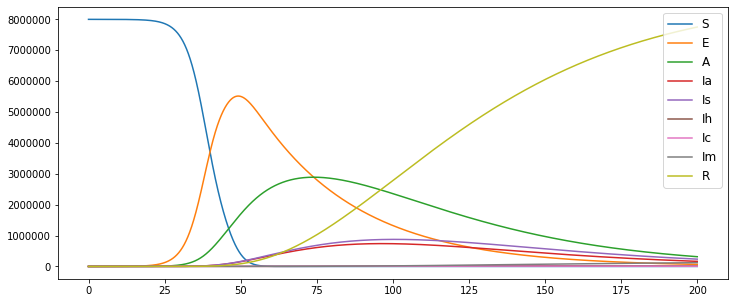

In [5]:
plt.figure( figsize=(12,5) )

S = np.sum(network_data[:,:,0], axis=1)
E = np.sum(network_data[:,:,1], axis=1)
A = np.sum(network_data[:,:,2], axis=1)
Ia = np.sum(network_data[:,:,3], axis=1)
Is = np.sum(network_data[:,:,4], axis=1)
Ih = np.sum(network_data[:,:,5], axis=1)
Ic = np.sum(network_data[:,:,6], axis=1)
Im = np.sum(network_data[:,:,7], axis=1)
R = np.sum(network_data[:,:,8], axis=1)

plt.plot(ts_days, S, label="S")
plt.plot(ts_days, E, label="E")
plt.plot(ts_days, A, label="A")
plt.plot(ts_days, Ia, label="Ia")
plt.plot(ts_days, Is, label="Is")
plt.plot(ts_days, Ih, label="Ih")
plt.plot(ts_days, Ic, label="Ic")
plt.plot(ts_days, Im, label="Im")
plt.plot(ts_days, R, label="R")

plt.legend(loc='upper right', fontsize=12)